In [1]:
pip install yfinance --quiet

     |████████████████████████████████| 62 kB 1.2 MB/s 


In [2]:
pip install pyfolio --quiet

     |████████████████████████████████| 91 kB 5.2 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 49.9 MB/s 


In [3]:
import yfinance as yf
import pyfolio as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


**Predefine the proporties of our Data set**

In [4]:
nse50= pd.read_csv('https://www1.nseindia.com/content/indices/ind_nifty50list.csv')
nse50=nse50.drop(['Company Name','Industry','ISIN Code'], axis=1)
nse50.head()

,Symbol,Series
0,ADANIENT,EQ
1,ADANIPORTS,EQ
2,APOLLOHOSP,EQ
3,ASIANPAINT,EQ
4,AXISBANK,EQ


In [5]:
risky_assets=list(nse50['Symbol'])
risky_assets

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'HDFC',
 'ICICIBANK',
 'ITC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'NESTLEIND',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'WIPRO']

In [6]:
start_date = "2018-09-02"
end_date = "2022-09-02"
n_assets = len(risky_assets)

In [7]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=6506144fad67bd1f3565e28b65c8b078563d92e1491630c9cec8466a5da65551
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [8]:
from nsepy import get_history
from datetime import date

In [9]:
#Function to get closing prices of all 50 stocks: can be modified to retain other values too 

def create_df(stock_name):
  start= date (2018, 1, 1)
  end = date (2022, 1, 1)
  df=get_history(symbol=stock_name, start=start, end=end)
  df=df[['Close']]
  return df

for i in range(50):
    exec(f'df_{i} = create_df(risky_assets[i])')

In [10]:
#Concatenating all of the 50 dataframes into one master DF for closing prices
closingdata=pd.DataFrame()
for i in range(50):
  exec(f'closingdata=pd.concat([closingdata,df_{i}], axis=1)')

In [11]:
#Renaming columns to make the DF readable
closingdata.columns=risky_assets

In [12]:
closingdata

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,166.05,399.65,1202.55,1143.65,565.50,3289.25,1725.65,5171.85,508.60,527.90,...,574.05,2645.60,312.90,424.45,722.20,503.10,852.45,755.75,4256.05,316.55
2018-01-02,163.90,397.40,1191.95,1142.75,559.50,3294.75,1724.65,5101.10,499.80,516.55,...,572.15,2631.20,311.15,439.30,729.30,513.95,845.15,773.45,4252.30,318.70
2018-01-03,176.20,407.65,1176.50,1141.90,560.45,3241.05,1715.30,5099.45,494.90,518.20,...,569.05,2638.65,311.20,433.90,734.95,519.45,856.30,775.80,4301.95,309.95
2018-01-04,183.30,409.85,1160.10,1172.05,559.90,3264.45,1754.00,5062.55,491.50,523.00,...,581.20,2657.10,312.25,429.95,760.25,522.55,892.90,781.65,4345.50,311.65
2018-01-05,193.15,423.80,1196.30,1185.25,563.25,3279.85,1814.50,5127.20,487.70,540.00,...,578.75,2689.20,312.95,431.60,770.70,525.45,909.70,774.20,4395.80,309.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1730.20,723.20,4840.05,3272.40,672.15,3154.10,6890.75,16013.10,374.40,675.75,...,794.10,3696.10,718.50,471.15,1121.80,1785.00,2331.30,756.60,7245.05,699.60
2021-12-28,1751.00,729.25,4844.20,3368.20,675.45,3176.05,6906.65,16100.85,380.40,680.05,...,815.10,3706.55,726.95,480.20,1127.45,1806.10,2379.85,761.75,7406.10,705.45
2021-12-29,1718.05,722.75,4976.60,3367.45,670.50,3262.50,6911.65,16249.05,381.10,676.85,...,838.80,3694.70,726.65,476.00,1116.25,1786.85,2402.15,758.35,7420.95,703.70


In [13]:
prices_df1=closingdata.copy(deep=True)

In [14]:
prices_df1.head(2)

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,166.05,399.65,1202.55,1143.65,565.5,3289.25,1725.65,5171.85,508.6,527.90,...,574.05,2645.6,312.90,424.45,722.2,503.10,852.45,755.75,4256.05,316.55
2018-01-02,163.90,397.40,1191.95,1142.75,559.5,3294.75,1724.65,5101.10,499.8,516.55,...,572.15,2631.2,311.15,439.30,729.3,513.95,845.15,773.45,4252.30,318.70


**Calculate the Daily Asset Returns of Individual Stocks**

In [15]:
returns = closingdata.pct_change().dropna()
returns.head(3)

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.012948,-0.005630,-0.008815,-0.000787,-0.010610,0.001672,-0.000579,-0.013680,-0.017302,-0.021500,...,-0.003310,-0.005443,-0.005593,0.034986,0.009831,0.021566,-0.008564,0.023420,-0.000881,0.006792
2018-01-03,0.075046,0.025793,-0.012962,-0.000744,0.001698,-0.016299,-0.005421,-0.000323,-0.009804,0.003194,...,-0.005418,0.002831,0.000161,-0.012292,0.007747,0.010701,0.013193,0.003038,0.011676,-0.027455
2018-01-04,0.040295,0.005397,-0.013940,0.026403,-0.000981,0.007220,0.022562,-0.007236,-0.006870,0.009263,...,0.021351,0.006992,0.003374,-0.009103,0.034424,0.005968,0.042742,0.007541,0.010123,0.005485


**Define Weights**

In [16]:
portfolio_weights = n_assets * [1/n_assets]

In [17]:
portfolio_weights

[0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02]

**Calculate Portfolio Return**

In [18]:
portfolio_return = pd.Series(np.dot(portfolio_weights, returns.T), index = returns.index)

In [19]:
portfolio_return

Date
2018-01-02   -0.000768
2018-01-03    0.001285
2018-01-04    0.009648
2018-01-05    0.008968
2018-01-08    0.006312
                ...   
2021-12-27    0.004586
2021-12-28    0.009781
2021-12-29    0.001084
2021-12-30    0.000052
2021-12-31    0.010523
Length: 990, dtype: float64

**Create the Tear Sheet of our Investment**

Start date,2018-01-02
End date,2021-12-31
Total months,47
,Backtest
Annual return,16.9%
Cumulative returns,84.4%
Annual volatility,20.0%
Sharpe ratio,0.88
Calmar ratio,0.43
Stability,0.59
Max drawdown,-38.8%


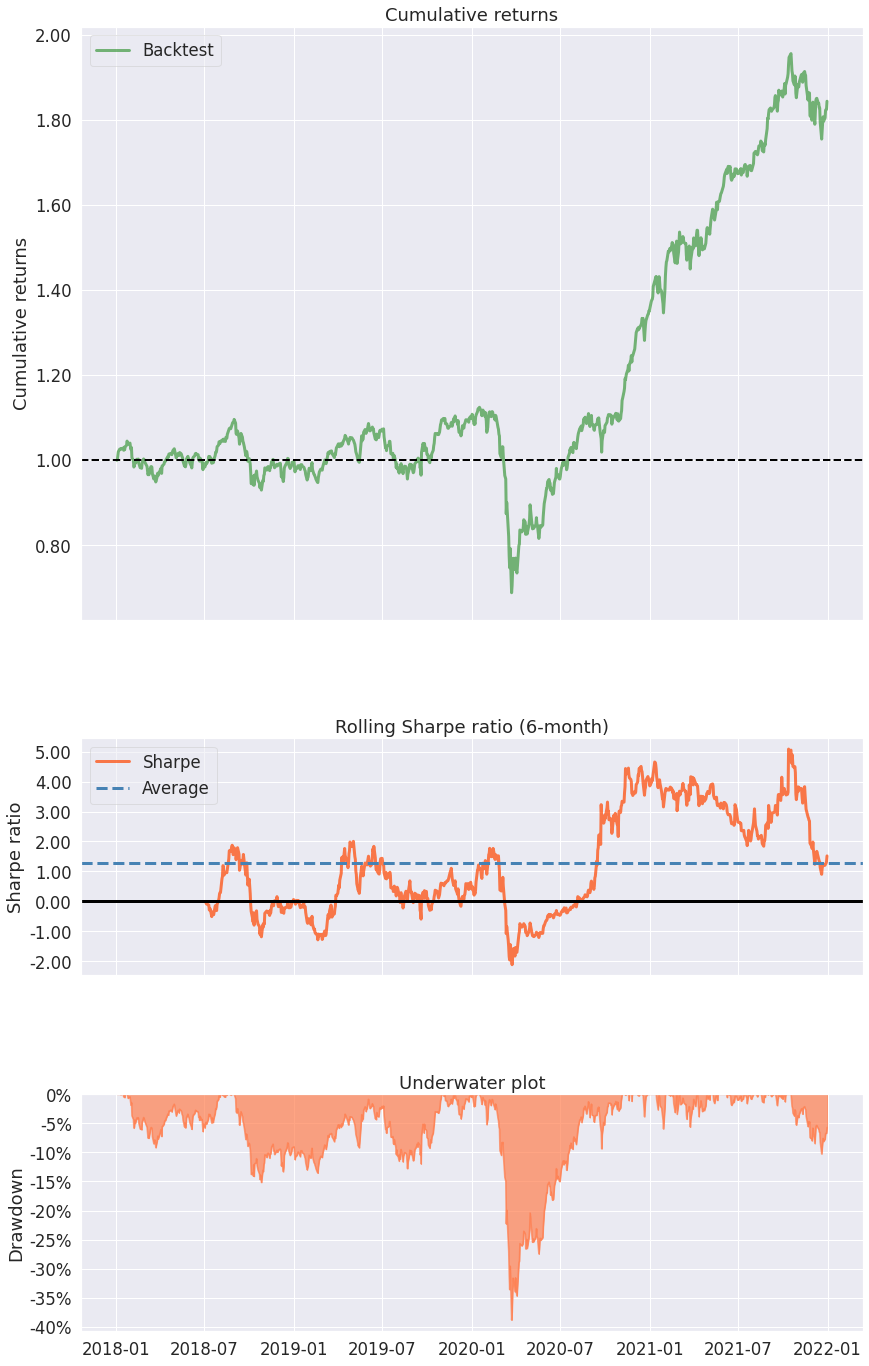

In [20]:
pf.create_simple_tear_sheet(portfolio_return)

**Create Portfolio and Effecient Frontier using Random Simulation**

**Set up the Parameters**

In [21]:
n_portfolios = 10**5
n_days = 252
#risky_assets = ["AAPL", "IBM", "MSFT", "AMZN", "META"]
#risky_assets.sort()
start_date = "2018-09-02"
end_date = "2022-09-02"
n_assets = len(risky_assets)

**Calculate Daily and Anualized Return and STD**

In [22]:
returns_df = closingdata.pct_change().dropna()
avg_return = returns_df.mean()*n_days
cov_mat = returns_df.cov()*n_days

In [23]:
avg_return

ADANIENT      0.731000
ADANIPORTS    0.225474
APOLLOHOSP    0.438796
ASIANPAINT    0.313778
AXISBANK      0.129375
BAJAJ-AUTO    0.036824
BAJFINANCE    0.448032
BAJAJFINSV    0.370787
BPCL          0.015227
BHARTIARTL    0.130523
BRITANNIA     0.011985
CIPLA         0.153019
COALINDIA    -0.099686
DIVISLAB      0.415751
DRREDDY       0.223391
EICHERMOT    -0.202404
GRASIM        0.151216
HCLTECH       0.197251
HDFCBANK      0.027501
HDFCLIFE      0.182875
HEROMOTOCO   -0.055461
HINDALCO      0.235254
HINDUNILVR    0.172552
HDFC          0.162328
ICICIBANK     0.291874
ITC          -0.008717
INDUSINDBK   -0.009835
INFY          0.241898
JSWSTEEL      0.308099
KOTAKBANK     0.198919
LT            0.147313
M&M           0.092771
MARUTI       -0.010852
NTPC         -0.045897
NESTLEIND     0.265608
ONGC          0.000692
POWERGRID     0.053098
RELIANCE      0.297142
SBILIFE       0.184343
SBIN          0.173713
SUNPHARMA     0.154100
TCS           0.174395
TATACONSUM    0.278722
TATAMOTORS 

In [24]:
cov_mat

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
ADANIENT,0.275241,0.099427,0.051697,0.040878,0.073409,0.042283,0.086346,0.074553,0.066363,0.052860,...,0.047401,0.034238,0.059117,0.101737,0.077430,0.036620,0.045396,0.061211,0.065061,0.032620
ADANIPORTS,0.099427,0.142683,0.033681,0.031856,0.062545,0.034839,0.063045,0.057777,0.051252,0.041506,...,0.032448,0.015195,0.049103,0.070677,0.062709,0.036241,0.036039,0.048817,0.050907,0.022203
APOLLOHOSP,0.051697,0.033681,0.151823,0.024751,0.037205,0.027720,0.050054,0.045622,0.030512,0.023837,...,0.031184,0.024063,0.039502,0.040027,0.038759,0.030509,0.027674,0.035538,0.038304,0.024932
ASIANPAINT,0.040878,0.031856,0.024751,0.075220,0.038878,0.026310,0.042230,0.040464,0.036032,0.024982,...,0.015104,0.013262,0.034217,0.036018,0.028283,0.021379,0.034185,0.037575,0.039089,0.014777
AXISBANK,0.073409,0.062545,0.037205,0.038878,0.162823,0.046162,0.091725,0.087803,0.066355,0.045680,...,0.032989,0.024866,0.050160,0.083560,0.069315,0.037531,0.054446,0.065660,0.056442,0.028684
BAJAJ-AUTO,0.042283,0.034839,0.027720,0.026310,0.046162,0.079816,0.047468,0.045718,0.037637,0.030485,...,0.024974,0.018554,0.030180,0.055870,0.037346,0.019697,0.037063,0.033684,0.033325,0.021385
BAJFINANCE,0.086346,0.063045,0.050054,0.042230,0.091725,0.047468,0.181920,0.134932,0.065868,0.049269,...,0.030591,0.020390,0.059033,0.085174,0.073343,0.038101,0.053921,0.058174,0.058498,0.022387
BAJAJFINSV,0.074553,0.057777,0.045622,0.040464,0.087803,0.045718,0.134932,0.150650,0.064369,0.048527,...,0.030301,0.018731,0.055102,0.077136,0.070635,0.035914,0.050894,0.059918,0.056842,0.022716
BPCL,0.066363,0.051252,0.030512,0.036032,0.066355,0.037637,0.065868,0.064369,0.169347,0.038111,...,0.032830,0.014543,0.046667,0.072690,0.065787,0.028073,0.038525,0.055610,0.052344,0.022203
BHARTIARTL,0.052860,0.041506,0.023837,0.024982,0.045680,0.030485,0.049269,0.048527,0.038111,0.130219,...,0.027561,0.017150,0.036073,0.051677,0.047389,0.022566,0.028050,0.034334,0.040426,0.014862


In [25]:
import matplotlib.pyplot as plt
import seaborn 

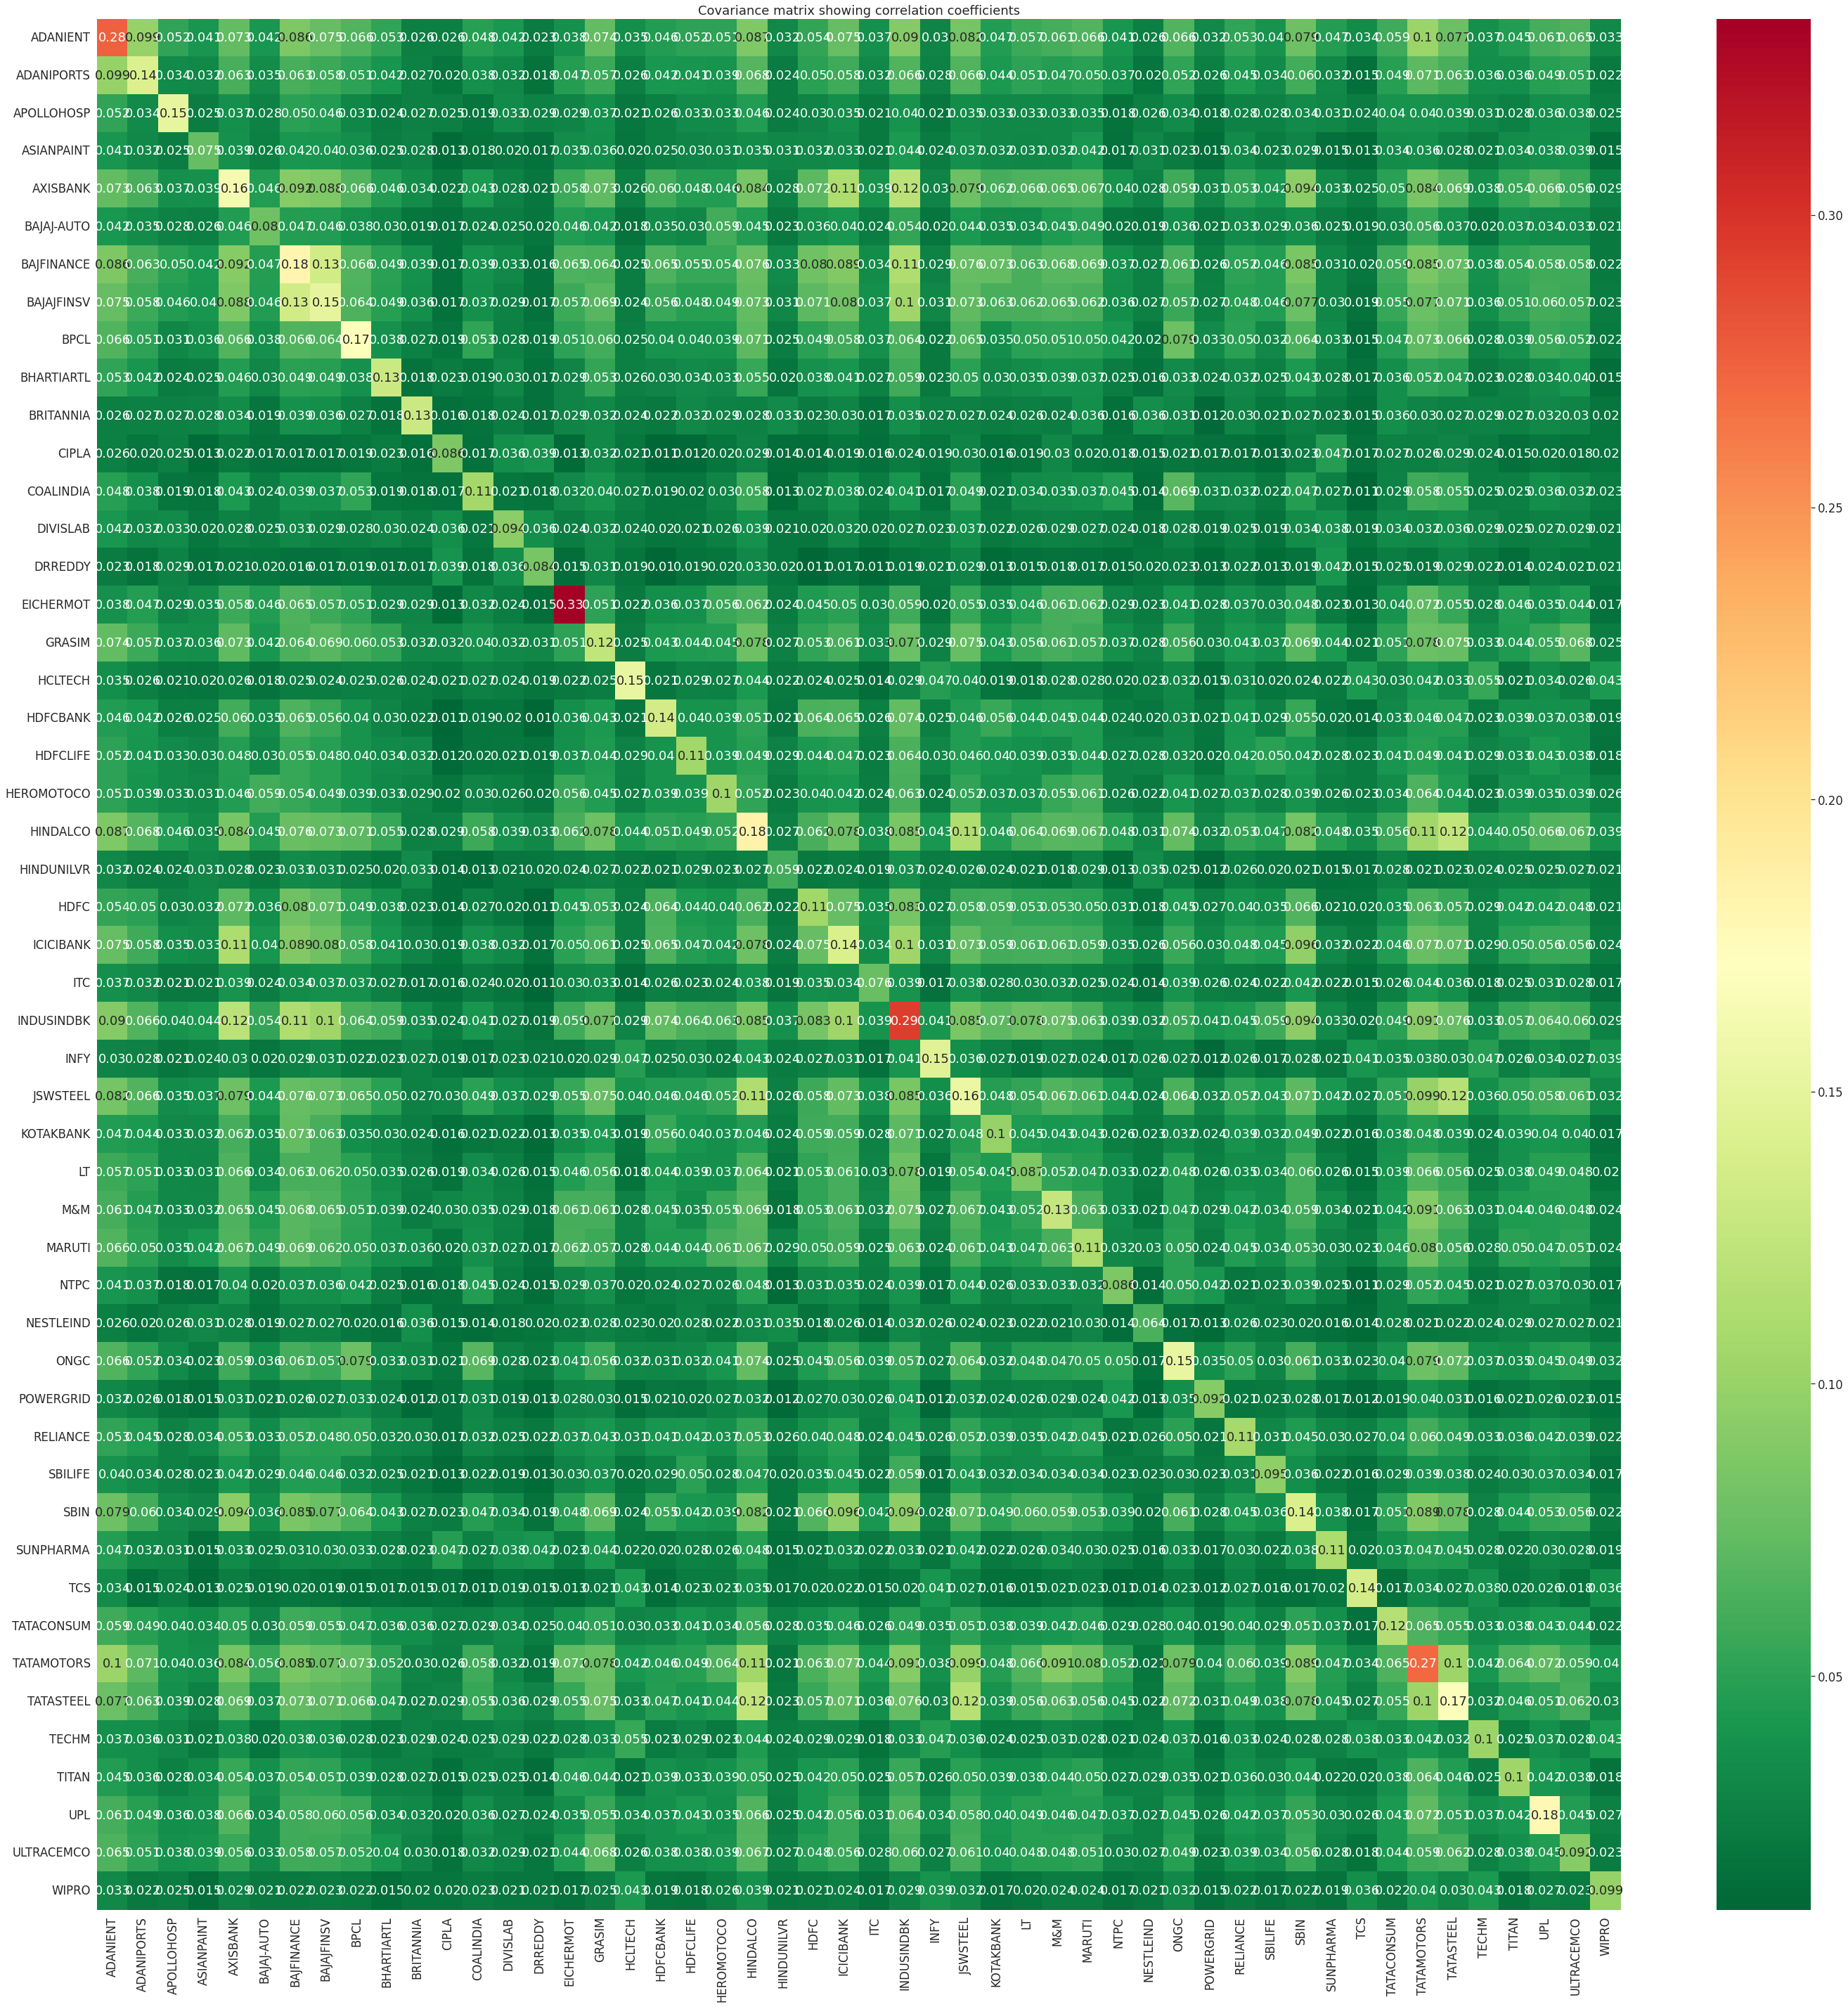

In [26]:
plt.figure(figsize=(40,40))
seaborn.set(font_scale=1.5)
#fig, ax = plt.subplots(figsize=(10,10))
hm = seaborn.heatmap(cov_mat,annot=True, xticklabels=risky_assets, yticklabels=risky_assets, cmap='RdYlGn_r')
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

**Simulate the Portfolio with a random weight Allocation**

In [27]:
np.random.seed(42)
weights = np.random.random(size = (n_portfolios, n_assets))
weights = weights/np.sum(weights, axis=1)[:, np.newaxis]

In [28]:
weights 

array([[0.01679839, 0.0426402 , 0.03283044, ..., 0.02332542, 0.02452034,
        0.00829085],
       [0.0392197 , 0.03135412, 0.03800273, ..., 0.01729403, 0.0010282 ,
        0.00436421],
       [0.0013142 , 0.02661135, 0.01314472, ..., 0.02101941, 0.00215257,
        0.01165154],
       ...,
       [0.0315007 , 0.03674932, 0.02147083, ..., 0.02111481, 0.03701674,
        0.01031765],
       [0.02857326, 0.02340171, 0.02108046, ..., 0.0049265 , 0.01530398,
        0.0289037 ],
       [0.00591904, 0.00630955, 0.0044316 , ..., 0.03761104, 0.02352028,
        0.00242614]])

**Developing the Portfolio**

In [29]:
portf_rtns = np.dot(weights, avg_return)

portf_vol = []

for i in range (0, len(weights)):
  portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))

portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns/portf_vol

**Create a Data Frame to see the Result**

In [30]:
portf_results_df = pd.DataFrame({"returns": portf_rtns, "volatility": portf_vol, "sharpe_ratio": portf_sharpe_ratio})
portf_results_df 

,returns,volatility,sharpe_ratio
0,0.171584,0.197320,0.869570
1,0.182495,0.204238,0.893543
2,0.157093,0.203435,0.772202
3,0.177181,0.207603,0.853463
4,0.176690,0.199966,0.883597
...,...,...,...
99995,0.168298,0.204380,0.823454
99996,0.188520,0.197232,0.955826
99997,0.175913,0.203668,0.863720
99998,0.196628,0.207815,0.946167


**Locating the points in Effecient Frontier**

In [31]:
n_points = 200
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), n_points)

portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for print_index in range(n_points):
  if portf_rtns_ef[print_index] not in portf_rtns:
    indices_to_skip.append(print_index)
    continue
  matched_ind = np.where(portf_rtns == portf_rtns_ef[print_index])
  portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip )

**Plotting the Opportunity Set of the Portfolios**

Text(0, 0.5, 'Expected Return')

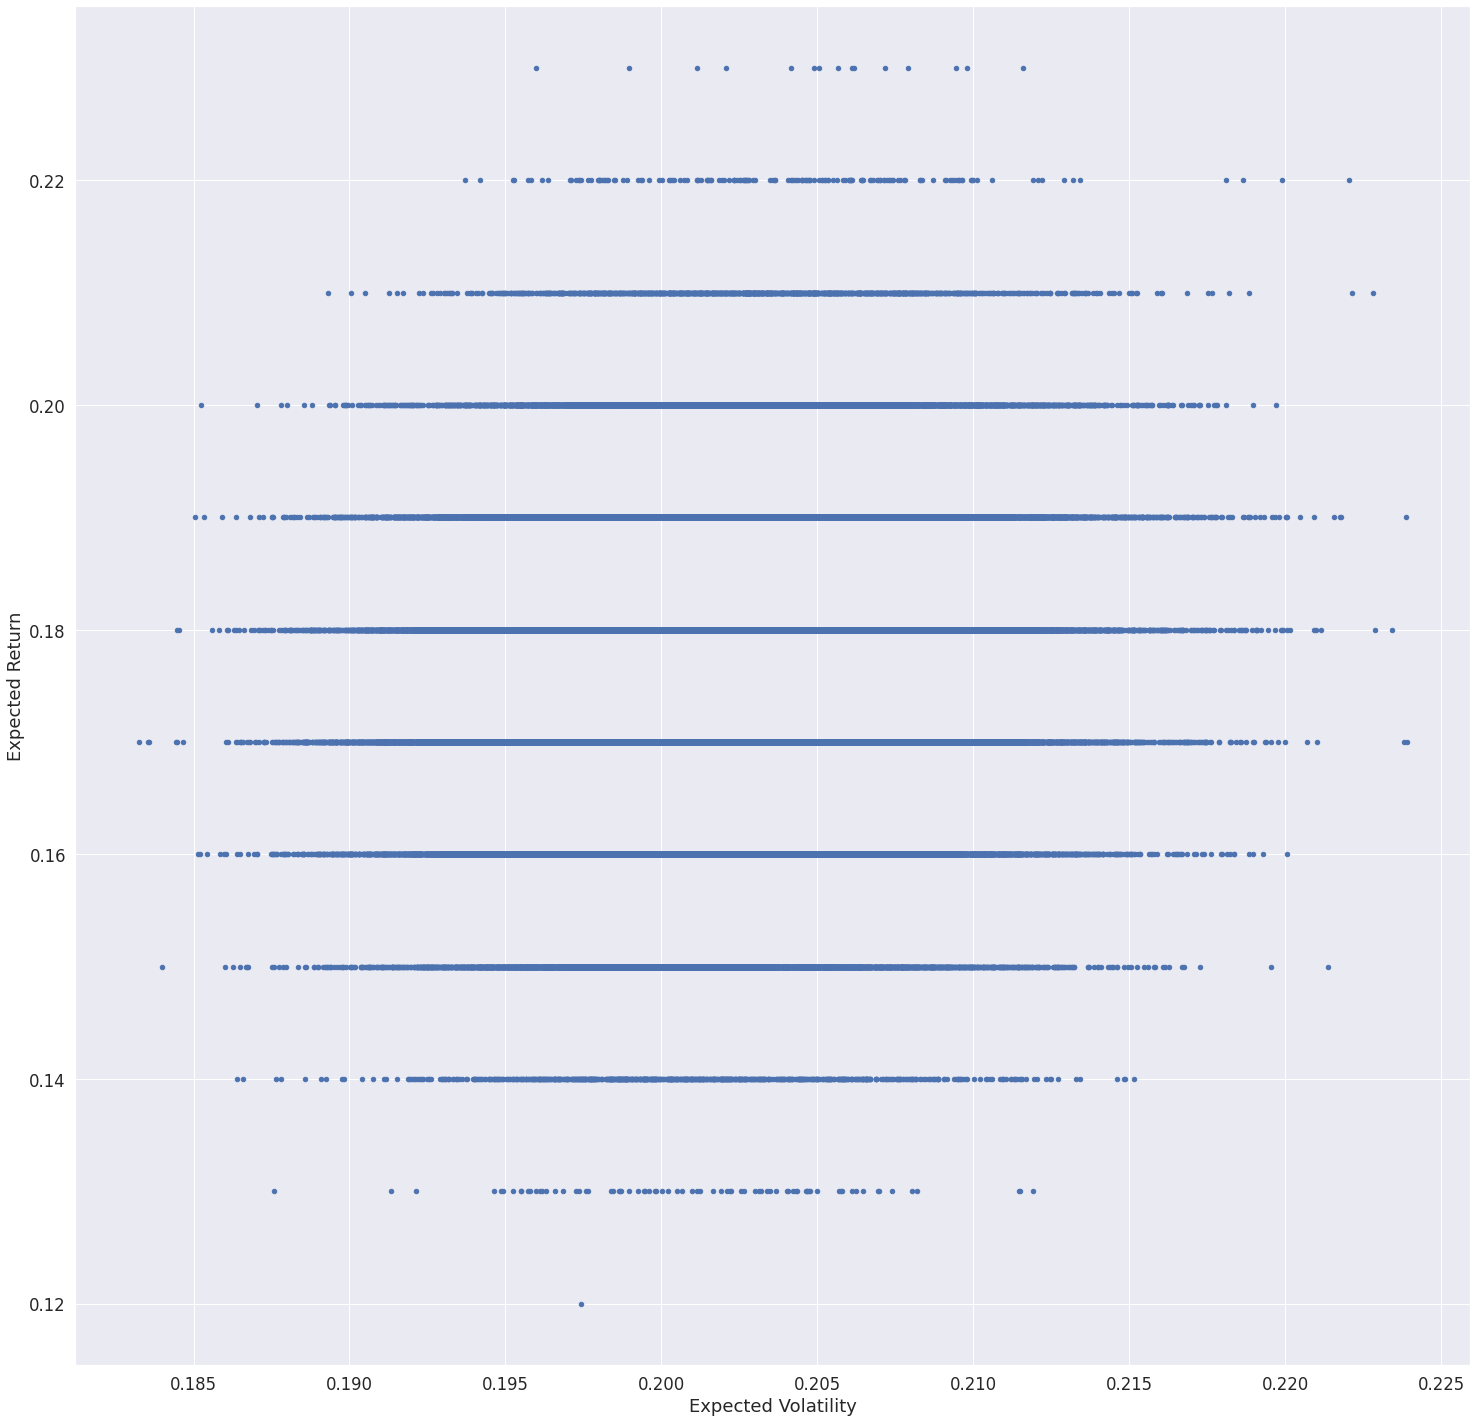

In [32]:
portfolios = pd.DataFrame({'Return': portf_rtns, 'Volatility': portf_vol })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(25,25));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

**Finding out the Best Portfolio**

**Portfolio with Max Sharpe Ratio**

In [33]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

In [34]:
print("Max Sharpe Ratio Portfolio")
print("**************************")
print("Performance of the Portfolio")
print("****************************")

for index, value in max_sharpe_portf.items():
  print(f"{index}: {100*value:.3f}%  ", end = "", flush = True)

print("\nWEIGHT of the Optimum Portfolio")
print("*********************************")

for x, y in zip(risky_assets, weights[np.argmax(portf_results_df.sharpe_ratio)]):
  print(f"{x}: {100*y:.3f}%  ", end = "", flush = True)

Max Sharpe Ratio Portfolio
**************************
Performance of the Portfolio
****************************
returns: 23.447%  volatility: 20.114%  sharpe_ratio: 116.570%  
WEIGHT of the Optimum Portfolio
*********************************
ADANIENT: 4.569%  ADANIPORTS: 2.617%  APOLLOHOSP: 1.299%  ASIANPAINT: 4.271%  AXISBANK: 0.127%  BAJAJ-AUTO: 2.099%  BAJFINANCE: 1.129%  BAJAJFINSV: 2.997%  BPCL: 1.256%  BHARTIARTL: 0.312%  BRITANNIA: 2.956%  CIPLA: 0.408%  COALINDIA: 0.111%  DIVISLAB: 3.554%  DRREDDY: 0.932%  EICHERMOT: 0.376%  GRASIM: 1.032%  HCLTECH: 1.774%  HDFCBANK: 0.708%  HDFCLIFE: 2.219%  HEROMOTOCO: 0.135%  HINDALCO: 4.445%  HINDUNILVR: 3.418%  HDFC: 2.256%  ICICIBANK: 3.741%  ITC: 0.651%  INDUSINDBK: 0.569%  INFY: 1.748%  JSWSTEEL: 4.476%  KOTAKBANK: 0.052%  LT: 0.546%  M&M: 3.651%  MARUTI: 1.781%  NTPC: 0.574%  NESTLEIND: 4.071%  ONGC: 3.549%  POWERGRID: 2.306%  RELIANCE: 4.613%  SBILIFE: 3.225%  SBIN: 2.617%  SUNPHARMA: 0.135%  TCS: 3.797%  TATACONSUM: 1.857%  TATAMOTOR

In [35]:
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [36]:
print("Min Volatility Portfolio")
print("**************************")
print("Performance of the Portfolio")
print("****************************")

for index, value in min_vol_portf.items():
  print(f"{index}: {100*value:.3f}%  ", end = "", flush = True)

print("\nWEIGHT of the Optimum Portfolio")
print("*********************************")

for x, y in zip(risky_assets, weights[np.argmin(portf_results_df.volatility)]):
  print(f"{x}: {100*y:.3f}%  ", end = "", flush = True)

Min Volatility Portfolio
**************************
Performance of the Portfolio
****************************
returns: 17.299%  volatility: 18.325%  sharpe_ratio: 94.403%  
WEIGHT of the Optimum Portfolio
*********************************
ADANIENT: 0.513%  ADANIPORTS: 1.981%  APOLLOHOSP: 3.974%  ASIANPAINT: 3.075%  AXISBANK: 0.274%  BAJAJ-AUTO: 3.587%  BAJFINANCE: 0.947%  BAJAJFINSV: 1.954%  BPCL: 3.649%  BHARTIARTL: 2.067%  BRITANNIA: 0.845%  CIPLA: 3.706%  COALINDIA: 1.504%  DIVISLAB: 3.465%  DRREDDY: 3.867%  EICHERMOT: 0.227%  GRASIM: 1.357%  HCLTECH: 4.030%  HDFCBANK: 4.131%  HDFCLIFE: 0.358%  HEROMOTOCO: 3.098%  HINDALCO: 2.011%  HINDUNILVR: 1.929%  HDFC: 1.570%  ICICIBANK: 0.249%  ITC: 3.067%  INDUSINDBK: 0.382%  INFY: 1.263%  JSWSTEEL: 0.942%  KOTAKBANK: 0.696%  LT: 1.460%  M&M: 2.709%  MARUTI: 1.334%  NTPC: 1.424%  NESTLEIND: 0.862%  ONGC: 2.135%  POWERGRID: 3.864%  RELIANCE: 0.017%  SBILIFE: 3.950%  SBIN: 2.130%  SUNPHARMA: 0.682%  TCS: 3.632%  TATACONSUM: 0.149%  TATAMOTORS: 